In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

tryb obrazu RGB
rozmiar (409, 311)


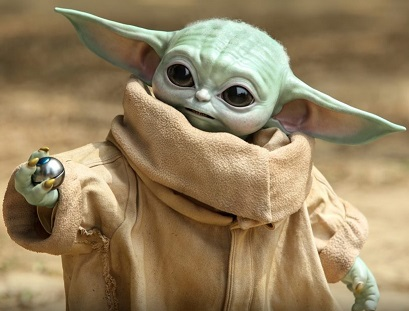

In [84]:
im = Image.open('baby_yoda.jpg')
print("tryb obrazu", im.mode)
print("rozmiar", im.size)
im

In [85]:
def zakres(w, h):  # funkcja, która uprości podwójna petle for
    return [(i, j) for i in range(w) for j in range(h)]

zmiana wartości pikseli za pomocą metod getpixel i putpixel

In [86]:
def pobierz_kolor_pixela(obraz, m, n):  # m, n współrzędne punktu na obrazie
    w, h = obraz.size
    if m < w and n < h:
        kolor = obraz.getpixel((m, n))
    return kolor


print(pobierz_kolor_pixela(im, 260, 200))

(154, 126, 89)


In [87]:
def wstaw_pixel_w_punkt(obraz, m, n, kolor):  # m, n współrzędne punktu na obrazie, kolor -  dane pixela do wstawienia
    w, h = obraz.size
    if m < w and n < h:
        obraz.putpixel((m, n), kolor)
    return obraz


def wstaw_pixel_w_zakresie(obraz, m, n, kolor, w_z, h_z):  # w miejscu m,n wstawia prostokąt o bokach w_z, h_z
    w, h = obraz.size
    for i, j in zakres(w_z, h_z):
        if i + m < w and j + n < h:
            obraz.putpixel((i + m, j + n), kolor)
    return obraz

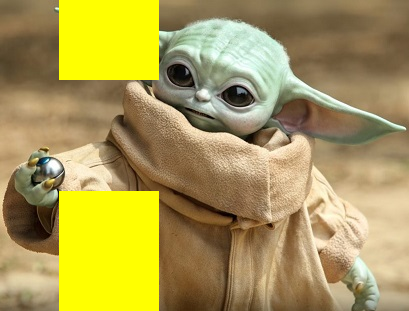

In [88]:
im1 = im.copy()
wstaw_pixel_w_zakresie(im1, -350, -120, (255, 255, 0), 100, 200)



In [89]:
def rozjasnij_obraz_w_zakresie(obraz, m, n, a, b, c, w_z, h_z):  # w miejscu m,n "rozjaśnia" prostokat o wymiaraxh w_z, h_z
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w_z, h_z):
        if i + m < w and j + n < h:
            p = obraz.getpixel((i + m, j + n))
            obraz1.putpixel((i + m, j + n), (p[0] + a, p[1] + b, p[2] + c))
    return obraz1

im2 = im.copy()
rozjasnij_obraz_w_zakresie(im2, -400, 150, -50, 50, -40, 100, 300)

In [90]:
def skopiuj_obraz_w_zakresie(obraz, m, n, m1, n1, w_z, h_z):  # kopiuje prostokat o wymiarach w_z, h_z z miejsca m,n i wstawia w miejscu m1,n1
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w_z, h_z):
        if i + m < w and j + n < h:
            p = obraz.getpixel((i + m, j + n))
            if i + m1 < w and j + n1 < h:
                obraz1.putpixel((i + m1, j + n1), p)
    return obraz1

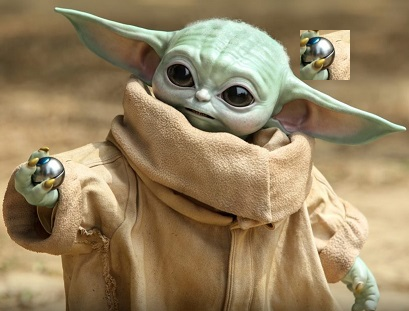

In [91]:
im3 = im.copy()
skopiuj_obraz_w_zakresie(im3, 30, 150, 300, 30, 50, 50)

In [92]:
def rozjasnij_obraz_z_maska(obraz, maska, m, n, a, b, c):  # w miejscu m, n zmienia tylko te pixele, które odpowiadają czarnym pixelom maski, maska jest obrazem czarnobiałym
    obraz1 = obraz.copy()
    w, h = obraz.size
    w0, h0 = maska.size
    for i, j in zakres(w0, h0):
        if i + m < w and j + n < h:
            if maska.getpixel((i, j)) == 0:
                p = obraz.getpixel((i + m, j + n))
                obraz1.putpixel((i + m, j + n), (p[0] + a, p[1] + b, p[2] + c))
    return obraz1

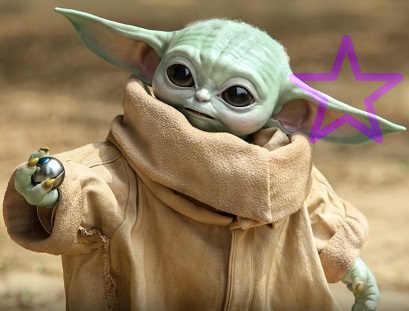

In [93]:
im4 = im.copy()
maska = Image.open('gwiazdka.bmp')
rozjasnij_obraz_z_maska(im4, maska, 270, 0, 20, -50, 80)

zmiana wartości pikseli za pomocą metody  load

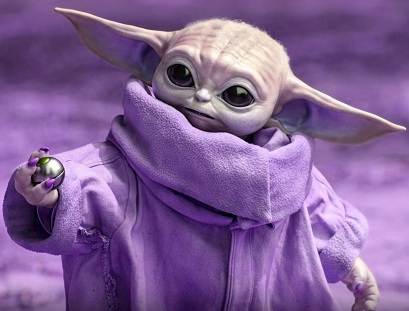

In [94]:
def zastosuj_funkcje(image, func):
    w, h = image.size
    pixele = image.load()
    for i, j in zakres(w, h):
        pixele[i, j] = func(pixele[i, j])

def przestaw_kolory(pixel):
    return (pixel[1], pixel[2], pixel[0])

im5 = im.copy()
zastosuj_funkcje(im5, przestaw_kolory)
im5

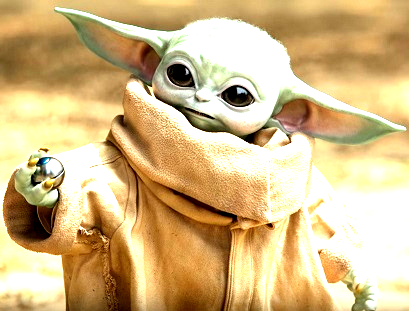

In [95]:
def filtr_liniowy(image, a, b): # a, b liczby całkowite
    w, h = image.size
    pixele = image.load()
    for i, j in zakres(w, h):
        pixele[i, j] = (pixele[i, j][0]* a + b, pixele[i, j][1]* a + b, pixele[i, j][2]* a + b)
    return image

im6 = im.copy()
filtr_liniowy(im6, 2, -50)


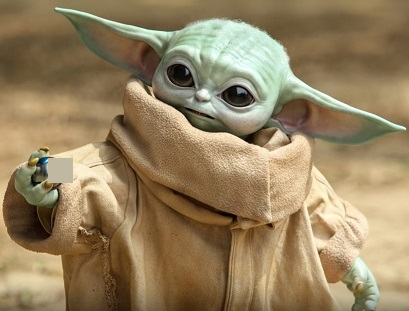

In [96]:
def rysuj_kwadrat_srednia(obraz, m, n, k): # m,n - srodek kwadratu, k - długość boku kwadratu
    obraz1 = obraz.copy()
    pix = obraz.load()
    pix1 = obraz1.load()
    d = int(k/2)
    temp = [0,0,0]
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pixel = pix[x, y]
            temp[0] += pixel[0] 
            temp[1] += pixel[1] 
            temp[2] += pixel[2] 
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            pix1[x, y] = (int(temp[0]/k**2), int(temp[1]/k**2), int(temp[2]/k**2))
    return obraz1
    
im7 = im.copy()
rysuj_kwadrat_srednia(im7, 60, 170, 25) 

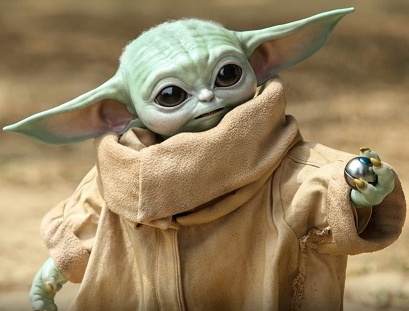

In [97]:
def odbij_w_pionie(im):
    px0 = im.load()
    img = im.copy()
    w, h = im.size
    px = img.load()
    for i in range(w):
        for j in range(h):
            px[i, j] = px0[w - 1- i, j]
    return img
odbij_w_pionie(im)

zmiana wartości pikseli za pomocą metody  point

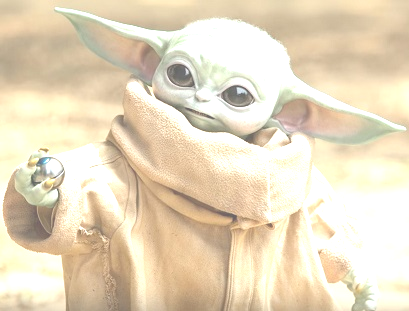

In [98]:
im8 = im.copy()
im8.point(lambda i: i + 100) # funkcja rozjasnia kazdy piksel o 100


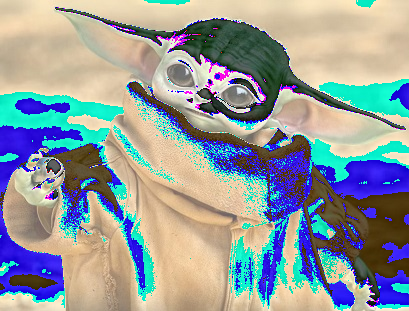

In [99]:
# dlaczego poniższe polececiania nie rozjasniaja obrazu tak jak funkcja "rozjaśnij"
obraz = im.copy()
T = np.array(obraz, dtype='uint8')
T += 100
obraz_wynik = Image.fromarray(T, "RGB")
obraz_wynik

Różne zastosowania

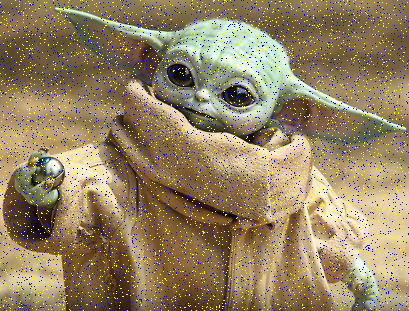

In [100]:
def dodaj_szum(obraz, n, kolor1, kolor2):  # dodawanie szumu typu salt and pepper
    w, h = obraz.size
    x, y = np.random.randint(0, w, n), np.random.randint(0, h,
                                                         n)  # powtarza n razy losowanie z zakresu 0,w i z zakresu 0,h
    for (i, j) in zip(x, y):  # zip robi pary z list x,y
        obraz.putpixel((i, j), (kolor1 if np.random.rand() < 0.5 else kolor2))  # salt-and-pepper
    return obraz

im9 = im.copy()
dodaj_szum(im9, 10000, (255,255,0), (0,0,255))

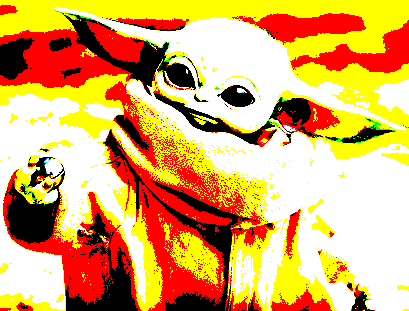

In [101]:
def efekt_plakatu(im, wsp):
    return im.point(lambda i: i > wsp and 255)  # jeżeli nieprawda, że i > wsp wstaw 0 a w przeciwnym przypadku wstaw 255

im10 = im.copy()
efekt_plakatu(im10, 100)  

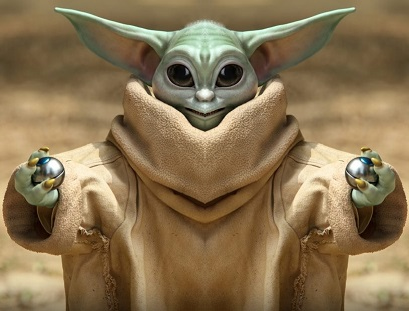

In [102]:
def odbij_lewa_strone_na_prawo(im):
    img = im.copy()
    w, h = im.size
    w1 = int(w / 2)
    px = img.load()
    for i in range(w1, w):
        for j in range(h):
            px[i, j] = px[w - i, j]
    return img

odbij_lewa_strone_na_prawo(im)

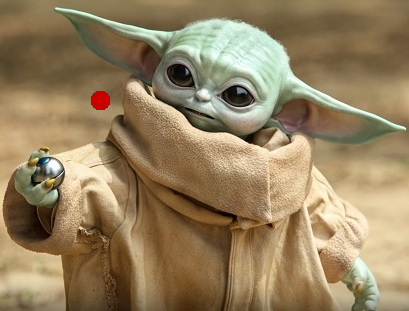

In [105]:
def rysuj_kolo(obraz, m_s, n_s, r, kolor):
    obraz1 = obraz.copy()
    w, h = obraz.size
    for i, j in zakres(w, h):
        if (i-m_s)**2+(j-n_s)**2 < r**2: # wzór na koło o środku (m_s, n_s) i promieniu r
            obraz1.putpixel((i,j), kolor)
    return obraz1


img = rysuj_kolo(im, 100, 100, 10, (200,0,0))
img


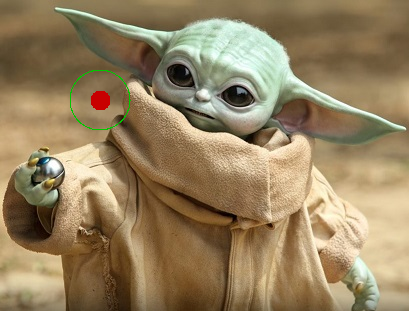

In [104]:
def rysuj_okrag(obraz, a, b ,r, kolor):
    obraz1 = obraz.copy()
    w,h = obraz.size
    for angle in range(0,360,1):
        y = int(r * math.sin(angle) + a)
        x = int(r * math.cos(angle) + b)
        if x < w and y < h:
            obraz1.putpixel((x,y), kolor)
    return obraz1

rysuj_okrag(img, 100, 100, 30, (0, 200,0))